In [39]:
import os
import urllib.request

In [40]:
if not os.path.exists("the_verdict.txt"):
  url = ("https://raw.githubusercontent.com/rasbt/"
            "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
            "the-verdict.txt")
  file_path = "the_verdict.txt"
  urllib.request.urlretrieve(url, file_path)

In [41]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
print("Total number of character : ", len(raw_text))
print(raw_text[:99])

Total number of character :  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [42]:
import re

In [43]:
# Example usage of re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [44]:
result = re.split(r'([.,]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [45]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [8]:
if ' '.strip():
  print('yest')

In [46]:
if ''.strip():
  print("yest")

In [47]:
if '  '.strip():
  print("yes")

In [48]:
h = ' h '
if h.strip():
  print(h.strip())

h


In [49]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [50]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [51]:
len(preprocessed)

4690

In [52]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


## Creating Vocab

In [53]:
vocab = {token:integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
  print(item)
  if i >=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


## Simple Tokenizer Class v1

In [54]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [55]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [56]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [57]:
tokenizer.decode(tokenizer.encode(text))

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [58]:
text = "Hello, do you like tea. Is this-- a test?"

tokenizer.encode(text)

KeyError: 'Hello'

In [59]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}
len(vocab.items())

1132

In [60]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


## Simple Tokenizer Class v2 (with special/unknown tokens)

In [61]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [62]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [63]:
tokenizer2 = SimpleTokenizerV2(vocab)

In [64]:
tokenizer2.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [65]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

### Tiktoken

In [66]:
!pip install tiktoken

In [67]:
from importlib.metadata import version
import tiktoken

print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.9.0


In [68]:
tokenizer = tiktoken.get_encoding("gpt2")

In [69]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [70]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [71]:
bpe_test = "Akwirw ier"
bpe_ints = tokenizer.encode(bpe_test)
print(bpe_ints)

[33901, 86, 343, 86, 220, 959]


In [72]:
for i in bpe_ints:
  print(i, " --> ", tokenizer.decode_single_token_bytes(i))

33901  -->  b'Ak'
86  -->  b'w'
343  -->  b'ir'
86  -->  b'w'
220  -->  b' '
959  -->  b'ier'


In [73]:
tokenizer.decode(bpe_ints)

'Akwirw ier'

In [77]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


- For each text chunk, we want the inputs and targets
- Since we want the model to predict the next word, the targets are the inputs shifted by one position to the right

In [78]:
enc_sample = enc_text[50:]

In [79]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [82]:
# One by one, the prediction would look like as follows:

for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [83]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [84]:
import torch
print("PyTorch version:", torch.__version__)

PyTorch version: 2.6.0+cu124


## Create Dataset and Dataloader that extract chunks from the input text dataset

In [85]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
        assert len(token_ids) > max_length, "Number of tokenized inputs must at least be equal to max_length+1"

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [86]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [88]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

In [89]:
# test the dataloader with a batch size of 1 for an LLM with a context size of 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [90]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [91]:
# Experiments with max_length and stride in dataloader

# Exp 1 : max_length = 2 and stride = 2
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=2, stride=2, shuffle=False
)

data_iter_exp = iter(dataloader)
first_batch_exp = next(data_iter_exp)
print(first_batch_exp)

second_batch_exp = next(data_iter_exp)
print(second_batch_exp)

# Exp 2 : max_length = 8 and stride = 2
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=8, stride=2, shuffle=False
)

data_iter_exp = iter(dataloader)
first_batch_exp = next(data_iter_exp)
print(first_batch_exp)

second_batch_exp = next(data_iter_exp)
print(second_batch_exp)

[tensor([[ 40, 367]]), tensor([[ 367, 2885]])]
[tensor([[2885, 1464]]), tensor([[1464, 1807]])]
[tensor([[  40,  367, 2885, 1464, 1807, 3619,  402,  271]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899]])]
[tensor([[ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138]]), tensor([[ 1464,  1807,  3619,   402,   271, 10899,  2138,   257]])]


In [92]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## Creating token embeddings

In [93]:
input_ids = torch.tensor([2, 3, 5, 1])

In [94]:
# Small vocabulary of only 6 words and Embedding of size 3

vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [95]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [96]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [97]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


- The BytePair encoder has a vocabulary size of 50,257:
- Suppose we want to encode the input tokens into a 256-dimensional vector representation

In [98]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

- If we sample data from the dataloader, we embed the tokens in each batch into a 256-dimensional vector
- If we have a batch size of 8 with 4 tokens each, this results in a 8 x 4 x 256 tensor

In [99]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [100]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [101]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

print(token_embeddings)

torch.Size([8, 4, 256])
tensor([[[ 0.4913,  1.1239,  1.4588,  ..., -0.3995, -1.8735, -0.1445],
         [ 0.4481,  0.2536, -0.2655,  ...,  0.4997, -1.1991, -1.1844],
         [-0.2507, -0.0546,  0.6687,  ...,  0.9618,  2.3737, -0.0528],
         [ 0.9457,  0.8657,  1.6191,  ..., -0.4544, -0.7460,  0.3483]],

        [[ 1.5460,  1.7368, -0.7848,  ..., -0.1004,  0.8584, -0.3421],
         [-1.8622, -0.1914, -0.3812,  ...,  1.1220, -0.3496,  0.6091],
         [ 1.9847, -0.6483, -0.1415,  ..., -0.3841, -0.9355,  1.4478],
         [ 0.9647,  1.2974, -1.6207,  ...,  1.1463,  1.5797,  0.3969]],

        [[-0.7713,  0.6572,  0.1663,  ..., -0.8044,  0.0542,  0.7426],
         [ 0.8046,  0.5047,  1.2922,  ...,  1.4648,  0.4097,  0.3205],
         [ 0.0795, -1.7636,  0.5750,  ...,  2.1823,  1.8231, -0.3635],
         [ 0.4267, -0.0647,  0.5686,  ..., -0.5209,  1.3065,  0.8473]],

        ...,

        [[-1.6156,  0.9610, -2.6437,  ..., -0.9645,  1.0888,  1.6383],
         [-0.3985, -0.9235, -1.31

- **An embedding layer is essentially a look-up operation**

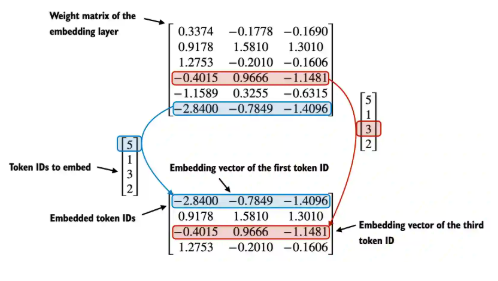

## Position Encoding

- GPT-2 uses absolute position embeddings

- Positional embeddings are combined with the token embedding vector to form the input embeddings for a large language model

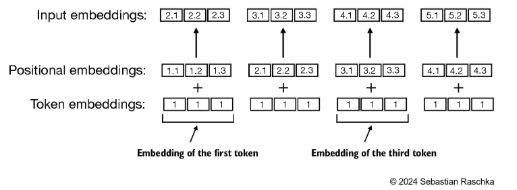

In [102]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

print(pos_embedding_layer.weight)

Parameter containing:
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       requires_grad=True)


In [104]:
torch.arange(4)

tensor([0, 1, 2, 3])

In [105]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

print(pos_embeddings)

torch.Size([4, 256])
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
        [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
       grad_fn=<EmbeddingBackward0>)


- To create the input embeddings used in an LLM, we simply add the token and the positional embeddings

In [106]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

print(input_embeddings)

torch.Size([8, 4, 256])
tensor([[[ 2.2288,  0.5619,  0.8286,  ..., -0.6272, -0.2987,  0.8900],
         [ 2.0903, -0.4664, -0.0593,  ...,  0.9115, -1.0493, -1.6473],
         [-0.7158, -0.8304,  1.2494,  ...,  2.3952,  1.8773,  0.8051],
         [ 0.2703,  0.4029,  3.0514,  ...,  0.3595, -1.4548,  0.8310]],

        [[ 3.2835,  1.1749, -1.4150,  ..., -0.3281,  2.4332,  0.6924],
         [-0.2199, -0.9114, -0.1750,  ...,  1.5337, -0.1998,  0.1462],
         [ 1.5197, -1.4240,  0.4391,  ...,  1.0494, -1.4318,  2.3057],
         [ 0.2893,  0.8346, -0.1884,  ...,  1.9602,  0.8709,  0.8796]],

        [[ 0.9662,  0.0952, -0.4640,  ..., -1.0320,  1.6290,  1.7771],
         [ 2.4468, -0.2154,  1.4984,  ...,  1.8766,  0.5595, -0.1423],
         [-0.3856, -2.5393,  1.1556,  ...,  3.6157,  1.3267,  0.4944],
         [-0.2487, -0.5275,  2.0009,  ...,  0.2930,  0.5977,  1.3300]],

        ...,

        [[ 0.1219,  0.3991, -3.2740,  ..., -1.1921,  2.6637,  2.6728],
         [ 1.2438, -1.6436, -1.11

- In the initial phase of the input processing workflow, the input text is segmented into separate tokens
- Following this segmentation, these tokens are transformed into token IDs based on a predefined vocabulary

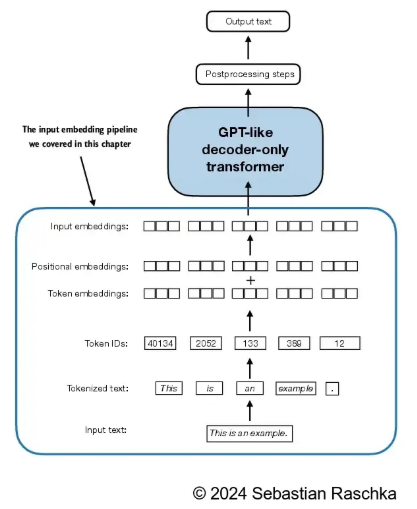

## * Extra

## Difference Between Embedding Layers and Linear Layers

### Using nn.Embedding

In [107]:
# Suppose we have the following 3 training examples,
# which may represent token IDs in a LLM context
idx = torch.tensor([2, 3, 1])

# The number of rows in the embedding matrix can be determined
# by obtaining the largest token ID + 1.
# If the highest token ID is 3, then we want 4 rows, for the possible
# token IDs 0, 1, 2, 3
num_idx = max(idx)+1

# The desired embedding dimension is a hyperparameter
out_dim = 5

In [108]:
# We use the random seed for reproducibility since
# weights in the embedding layer are initialized with
# small random values
torch.manual_seed(123)

embedding = torch.nn.Embedding(num_idx, out_dim)

In [109]:
embedding.weight

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  1.5810],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015],
        [ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953]], requires_grad=True)

In [110]:
embedding.weight.shape

torch.Size([4, 5])

In [111]:
embedding(torch.tensor([1]))

tensor([[ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

In [112]:
embedding(torch.tensor([2]))

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315]],
       grad_fn=<EmbeddingBackward0>)

In [113]:
idx = torch.tensor([2, 3, 1])
embedding(idx)

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

### Using nn.Linear

The Embedding layer above accomplishes exactly the same as nn.Linear layer on a one-hot encoded representation in PyTorch

In [114]:
#  convert the token IDs into a one-hot representation

onehot = torch.nn.functional.one_hot(idx)
onehot

tensor([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]])

In [115]:
# Initialize a Linear layer, which carries out a matrix multiplication XW^T

torch.manual_seed(123)
linear = torch.nn.Linear(num_idx, out_dim, bias=False)
linear.weight

Parameter containing:
tensor([[-0.2039,  0.0166, -0.2483,  0.1886],
        [-0.4260,  0.3665, -0.3634, -0.3975],
        [-0.3159,  0.2264, -0.1847,  0.1871],
        [-0.4244, -0.3034, -0.1836, -0.0983],
        [-0.3814,  0.3274, -0.1179,  0.1605]], requires_grad=True)

Note that the linear layer in PyTorch is also initialized with small random weights; to directly compare it to the Embedding layer above, we have to use the same small random weights, which is why we reassign them here

In [116]:
linear.weight = torch.nn.Parameter(embedding.weight.T)

In [117]:
linear(onehot.float())

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]], grad_fn=<MmBackward0>)

In [118]:
embedding(idx)

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)

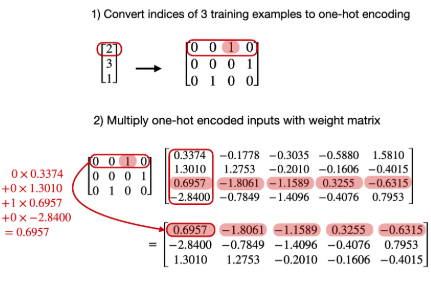

- Since all but one index in each one-hot encoded row are 0 (by design), this matrix multiplication is essentially the same as a look-up of the one-hot elements
- This use of the matrix multiplication on one-hot encodings is equivalent to the embedding layer look-up but can be inefficient if we work with large embedding matrices, because there are a lot of wasteful multiplications by zero

-- EXTRA EXPERIMENTS - (not related to this notebook)

In [ ]:
mask = torch.triu(torch.ones(6, 6), diagonal=1)
mask

In [ ]:
torch.manual_seed(42)
x = torch.randn(6, 6)
x

In [ ]:
masked = x.masked_fill(mask.bool(), -torch.inf)
masked